           Metric     Value
     Total Return -0.817218
             CAGR -0.132191
Annual Volatility  0.383915
     Sharpe Ratio -0.163819
     Max Drawdown -0.920636


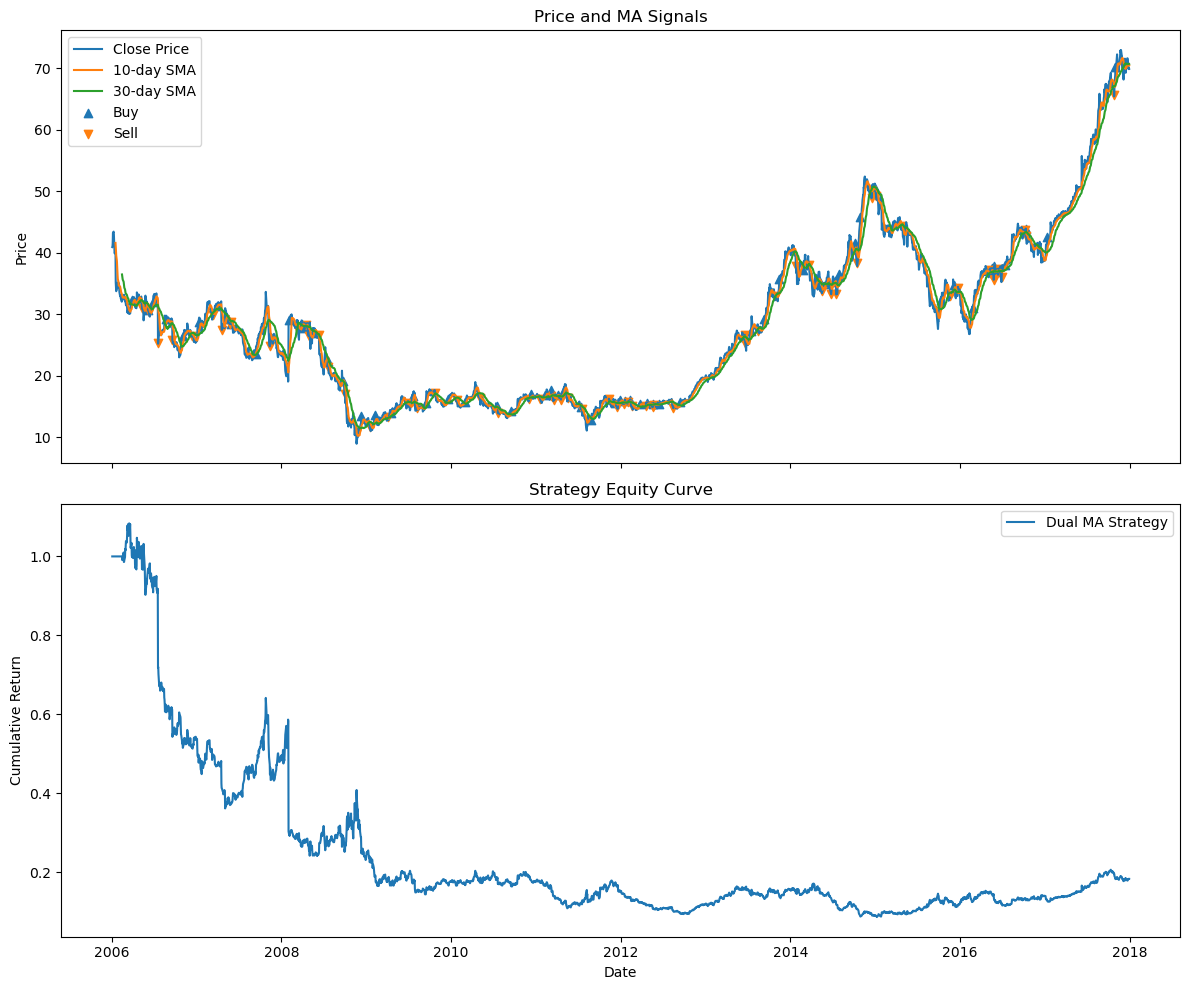

(             Open   High    Low  Close    Volume  Name  SMA_10     SMA_30  \
 Date                                                                        
 2006-01-03  39.69  41.22  38.79  40.91  24232729  AABA     NaN        NaN   
 2006-01-04  41.22  41.90  40.77  40.97  20553479  AABA     NaN        NaN   
 2006-01-05  40.93  41.73  40.85  41.53  12829610  AABA     NaN        NaN   
 2006-01-06  42.88  43.57  42.80  43.21  29422828  AABA     NaN        NaN   
 2006-01-09  43.10  43.66  42.82  43.42  16268338  AABA     NaN        NaN   
 ...           ...    ...    ...    ...       ...   ...     ...        ...   
 2017-12-22  71.42  71.87  71.22  71.58  10979165  AABA  70.648  70.674667   
 2017-12-26  70.94  71.39  69.63  69.86   8542802  AABA  70.481  70.651667   
 2017-12-27  69.77  70.49  69.69  70.06   6345124  AABA  70.510  70.644667   
 2017-12-28  70.12  70.32  69.51  69.82   7556877  AABA  70.368  70.654667   
 2017-12-29  69.79  70.13  69.43  69.85   6613070  AABA  70.430 

In [1]:
## 均线交叉策略的实现与可视化
import glob
from utils.BacktestRunner import BacktestRunner
from utils.basicFeature import basicFeature
from utils.basicStrategy import dual_ma_strategy, macd_strategy


temp = BacktestRunner(dual_ma_strategy, basicFeature.load_data("./time-series-data/AABA_2006-01-01_to_2018-01-01.csv"), short_window=10, long_window=30)
temp.run(plot=True)

           Metric     Value
     Total Return  0.930185
             CAGR  0.056397
Annual Volatility  0.120411
     Sharpe Ratio  0.515721
     Max Drawdown -0.252198


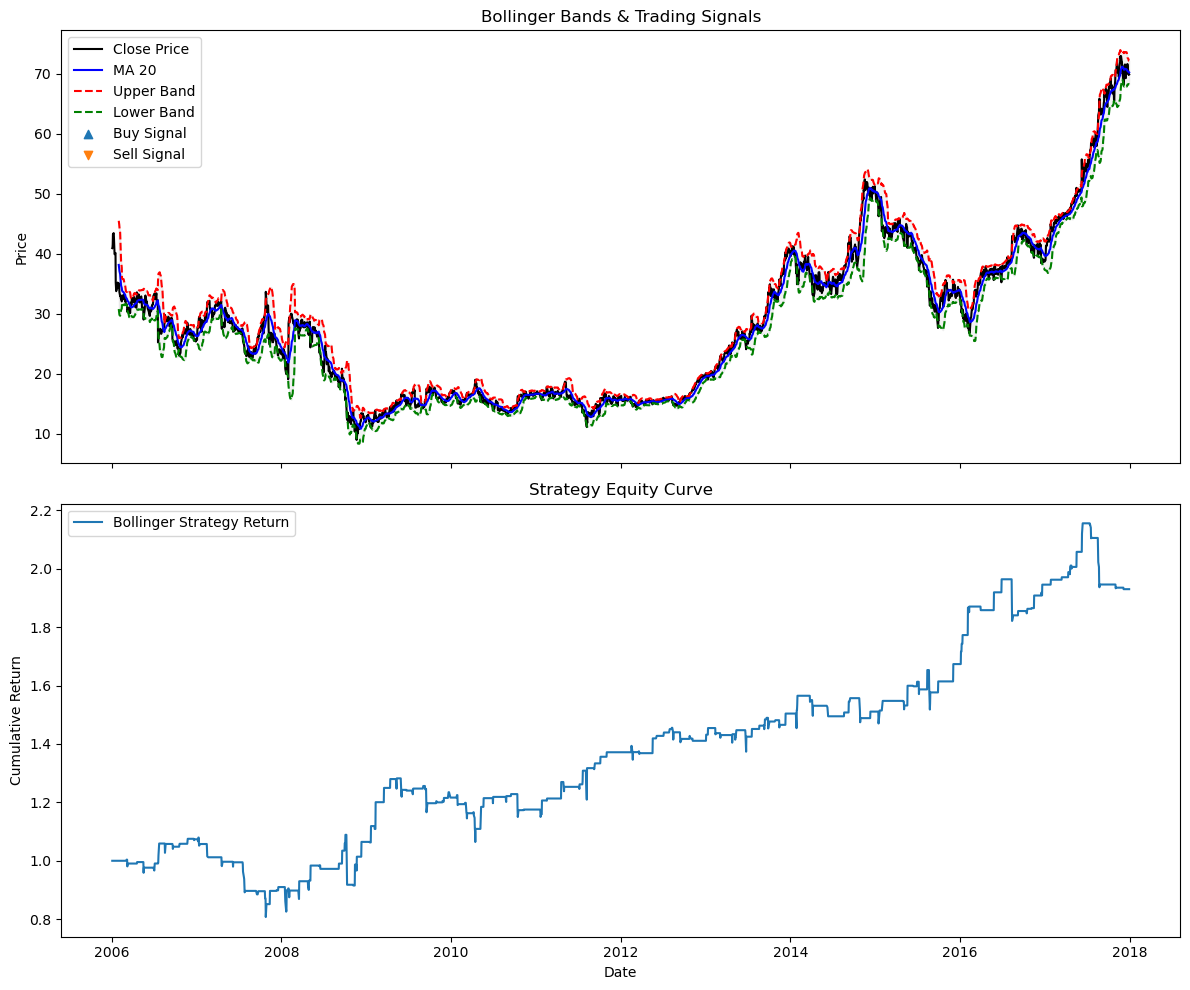

(             Open   High    Low  Close    Volume  Name    MA_20    STD_20  \
 Date                                                                        
 2006-01-03  39.69  41.22  38.79  40.91  24232729  AABA      NaN       NaN   
 2006-01-04  41.22  41.90  40.77  40.97  20553479  AABA      NaN       NaN   
 2006-01-05  40.93  41.73  40.85  41.53  12829610  AABA      NaN       NaN   
 2006-01-06  42.88  43.57  42.80  43.21  29422828  AABA      NaN       NaN   
 2006-01-09  43.10  43.66  42.82  43.42  16268338  AABA      NaN       NaN   
 ...           ...    ...    ...    ...       ...   ...      ...       ...   
 2017-12-22  71.42  71.87  71.22  71.58  10979165  AABA  70.4185  1.116014   
 2017-12-26  70.94  71.39  69.63  69.86   8542802  AABA  70.3080  1.051428   
 2017-12-27  69.77  70.49  69.69  70.06   6345124  AABA  70.2120  0.975654   
 2017-12-28  70.12  70.32  69.51  69.82   7556877  AABA  70.1850  0.978810   
 2017-12-29  69.79  70.13  69.43  69.85   6613070  AABA  70.1745

In [2]:
## 布林带策略的实现与可视化
import glob
from utils.BacktestRunner import BacktestRunner
from utils.basicFeature import basicFeature
from utils.basicStrategy import bollinger_strategy


temp = BacktestRunner(bollinger_strategy, basicFeature.load_data("./time-series-data/AABA_2006-01-01_to_2018-01-01.csv"))
temp.run(plot=True)

           Metric     Value
     Total Return  1.081192
             CAGR  0.063056
Annual Volatility  0.172121
     Sharpe Ratio  0.441501
     Max Drawdown -0.481393


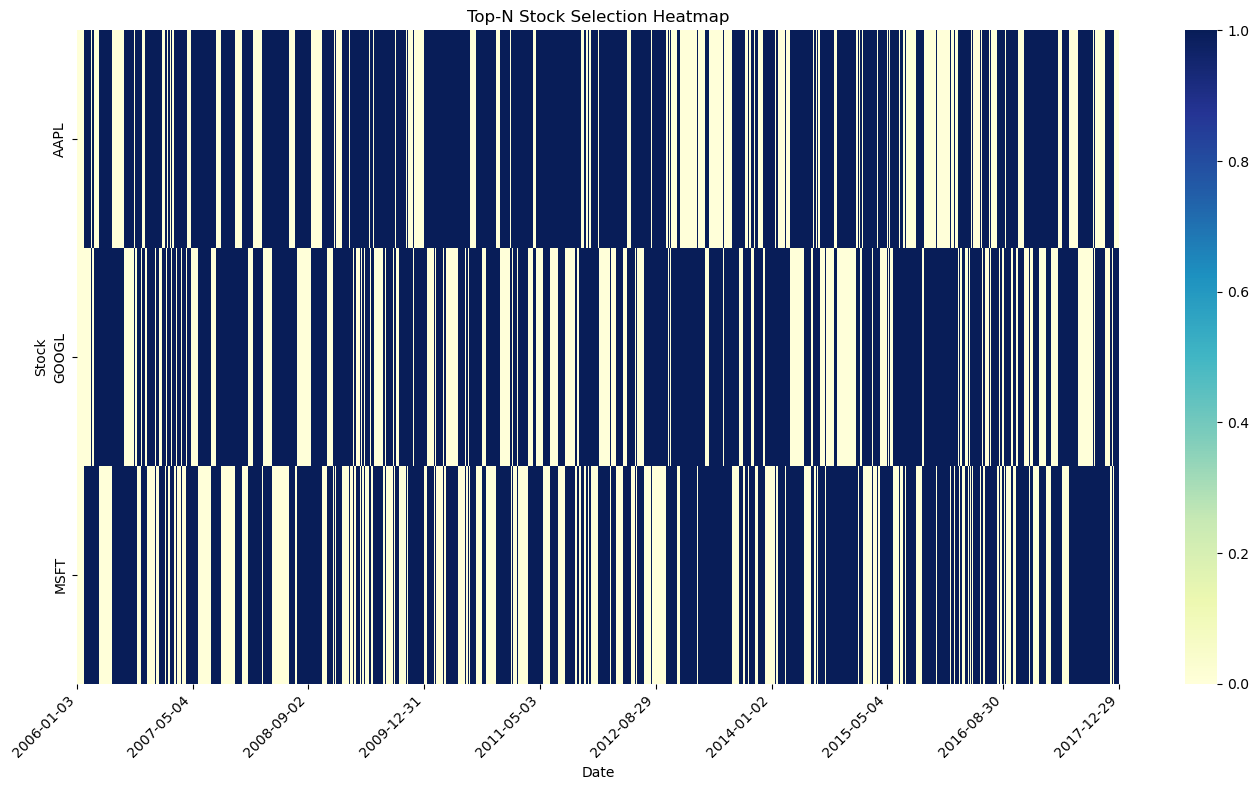

(                      Open     High      Low    Close     Volume   Name  \
 Date       Ticker                                                         
 2006-01-03 AAPL      10.34    10.68    10.32    10.68  201853036   AAPL   
            GOOGL    211.47   218.05   209.32   217.83   13137450  GOOGL   
            MSFT      26.25    27.00    26.10    26.84   79974418   MSFT   
 2006-01-04 AAPL      10.73    10.85    10.64    10.71  155225609   AAPL   
            GOOGL    222.17   224.70   220.09   222.84   15292353  GOOGL   
 ...                    ...      ...      ...      ...        ...    ...   
 2017-12-28 GOOGL   1062.25  1064.84  1053.38  1055.95     994249  GOOGL   
            MSFT      85.90    85.93    85.55    85.72   10594344   MSFT   
 2017-12-29 AAPL     170.52   170.59   169.22   169.23   25999922   AAPL   
            GOOGL   1055.49  1058.05  1052.70  1053.40    1180340  GOOGL   
            MSFT      85.63    86.05    85.50    85.54   18717406   MSFT   
 
          

In [3]:
## 动量策略的实现与可视化
import glob
from utils.BacktestRunner import BacktestRunner
from utils.basicFeature import basicFeature
from utils.basicStrategy import momentum_topN_strategy
from utils.misc import load_multi_stock_data

stock_list = ["AAPL", "MSFT", "GOOGL"]
multi_df = load_multi_stock_data(stock_list)

runner = BacktestRunner(momentum_topN_strategy, multi_df, lookback=20, top_n=2)
runner.run(plot=True)

In [4]:
## 混合策略的实现与可视化
from utils.basicStrategy import dual_ma_strategy, macd_strategy, rsi_strategy, composite_strategy
from utils.basicFeature import basicFeature

df = basicFeature.load_data("./time-series-data/AABA_2006-01-01_to_2018-01-01.csv")
static_feats = basicFeature.integrate_all_features("./time-series-data/AABA_2006-01-01_to_2018-01-01.csv").iloc[0].to_dict()

comp = composite_strategy(df, static_features=static_feats)
comp.add_strategy(dual_ma_strategy, weight=1.0, short_window=10, long_window=30)
comp.add_strategy(macd_strategy, weight=1.0)
comp.add_strategy(rsi_strategy, weight=1.0)

comp.strategy()
# comp.plot_results()
print(comp.evaluate_performance())

              Metric     Value
0       Total Return -0.909581
1               CAGR -0.181682
2  Annual Volatility  0.315808
3       Sharpe Ratio -0.461105
4       Max Drawdown -0.929462


In [5]:
## 其余策略的实现(PPT中给出的所有方法在basicStrategy.py中均有实现，这里只是给一个macd的例子)
import glob
from utils.BacktestRunner import BacktestRunner
from utils.basicFeature import basicFeature
from utils.basicStrategy import dual_ma_strategy

csv_files = glob.glob("./time-series-data/*.csv")
for path in csv_files:
    temp = BacktestRunner(macd_strategy, basicFeature.load_data(path))
    temp.run(plot=False)

           Metric     Value
     Total Return -0.871601
             CAGR -0.157386
Annual Volatility  0.409863
     Sharpe Ratio -0.210484
     Max Drawdown -0.926196
           Metric     Value
     Total Return -0.740345
             CAGR -0.106398
Annual Volatility  0.269188
     Sharpe Ratio -0.282525
     Max Drawdown -0.836742
           Metric     Value
     Total Return -0.345857
             CAGR -0.034790
Annual Volatility  0.157459
     Sharpe Ratio -0.145803
     Max Drawdown -0.688110
           Metric     Value
     Total Return  0.023989
             CAGR  0.001980
Annual Volatility  0.327516
     Sharpe Ratio  0.174207
     Max Drawdown -0.678363
           Metric     Value
     Total Return  1.148897
             CAGR  0.065899
Annual Volatility  0.319756
     Sharpe Ratio  0.359751
     Max Drawdown -0.677247
           Metric     Value
     Total Return -0.980613
             CAGR -0.280336
Annual Volatility  0.386193
     Sharpe Ratio -0.645512
     Max Drawdown -0